<a href="https://colab.research.google.com/github/hl105/my-spotify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install spotipy

In [85]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import spotipy # python library for spotify web API
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime, timedelta

In [86]:
client_id = "31628b5b3b6d4f57a64a0ab9755c9ceb"
client_secret = "c8c9611ef1154ebe898dd20033e59203"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [87]:
df1 = pd.read_json('/content/StreamingHistory1.json')
df0 = pd.read_json('/content/StreamingHistory0.json')

In [88]:
df = pd.concat([df1, df0], axis=0)

In [89]:
# create merged json file
df.to_json('/merged.json', orient='records')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12620 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     12620 non-null  object
 1   artistName  12620 non-null  object
 2   trackName   12620 non-null  object
 3   msPlayed    12620 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1009.0+ KB


In [91]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2023-04-20 15:57,n@di,Letter,177000
1,2023-04-20 16:01,KYUL,Broken,221500
2,2023-04-20 16:04,ALEPH,Wind Wishes,155126
3,2023-04-20 17:57,BIG Naughty,Beyond Love (Feat. 10CM),188706
4,2023-04-20 18:01,BIG Naughty,Fxxxnds (Feat. Kim Min Seok of MeloMance),27645


**How much time do I spend on Spotify?**

In [92]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['endTime'].head()

0   2023-04-20 15:57:00
1   2023-04-20 16:01:00
2   2023-04-20 16:04:00
3   2023-04-20 17:57:00
4   2023-04-20 18:01:00
Name: endTime, dtype: datetime64[ns]

In [93]:
# extract only the date
df['date'] = df['endTime'].dt.floor('D') #D for date, H for hour
df['date'].head()

0   2023-04-20
1   2023-04-20
2   2023-04-20
3   2023-04-20
4   2023-04-20
Name: date, dtype: datetime64[ns]

In [94]:
# extract only the hour
df['hour_of_day'] = df['endTime'].dt.hour
df['hour_of_day'].head()

# Q: What's the difference between using:
# df['hour'] = df['endTime'].dt.floor('H')?
# A: That would give us: 2023-04-20 15:00:00 <= this format

0    15
1    16
2    16
3    17
4    18
Name: hour_of_day, dtype: int64

In [95]:
# get duration
df['minutes'] = df['msPlayed']/1000/60
df['minutes'].head()

0    2.950000
1    3.691667
2    2.585433
3    3.145100
4    0.460750
Name: minutes, dtype: float64

In [96]:
df.head()

,endTime,artistName,trackName,msPlayed,date,hour_of_day,minutes
0,2023-04-20 15:57:00,n@di,Letter,177000,2023-04-20,15,2.950000
1,2023-04-20 16:01:00,KYUL,Broken,221500,2023-04-20,16,3.691667
2,2023-04-20 16:04:00,ALEPH,Wind Wishes,155126,2023-04-20,16,2.585433
3,2023-04-20 17:57:00,BIG Naughty,Beyond Love (Feat. 10CM),188706,2023-04-20,17,3.145100
4,2023-04-20 18:01:00,BIG Naughty,Fxxxnds (Feat. Kim Min Seok of MeloMance),27645,2023-04-20,18,0.460750


In [99]:
# get streaming hours per week

# groupby(), Grouper
# very useful function in data analysis
# split obj, apply function, combine results
# Grouper key needs to be datetime, not obj

# agg(): calculate weekly streaming hours
# gets parameters in dict form, use for mulitple features
# reset.index(): for adding simple index (0,1,..)

#still in minutes
stream_hours = df.groupby(pd.Grouper(key='date',freq = 'W-MON')).agg(hours=('minutes','sum')).reset_index()

#convert to hours
stream_hours['hours'] /= 60


stream_hours.head()

,date,hours
0,2022-09-12,0.278726
1,2022-09-19,1.313057
2,2022-09-26,10.086306
3,2022-10-03,3.601927
4,2022-10-10,5.443733


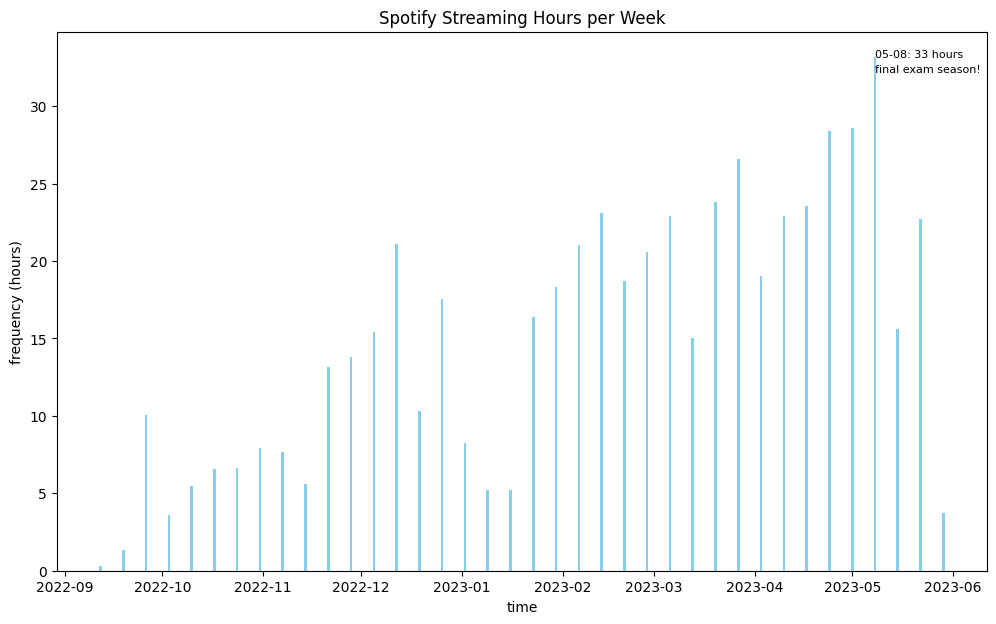

In [98]:
#set figure and axis
fig, ax= plt.subplots(figsize= (12,7),)

#draw bar
bar = ax.bar(stream_hours['date'], stream_hours['hours'], color = 'skyblue')

'''
we can also format the ticks by:
# set_major_formatter(): format x ticks
'''

# labels
ax.set_xlabel('time')
ax.set_ylabel('frequency (hours)')
ax.set_title('Spotify Streaming Hours per Week')

# longest bar length
max_hour_index = stream_hours['hours'].idxmax() # index of max hour
max_hour_x = stream_hours['date'][max_hour_index]
max_hour_y = stream_hours['hours'][max_hour_index]

# comment
ax.annotate(f"{max_hour_x.strftime('%m-%d')}: {round(max_hour_y)} hours",(max_hour_x, max_hour_y), fontsize = 8)
ax.annotate('final exam season!', (max_hour_x, max_hour_y-1), fontsize = 8)


plt.show()